## Labels for MacaquePose and MacaqueCopyPaste

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from random import sample
from PIL import Image
import json
import csv
import re
from random import random
from random import seed

## Create labels

The folder structure should be as in crowdhuman, i.e. one folder called images with subfolders train and val, containing single .jpg images.

And one empty folder called labels_with_ids with subfolders train and val in which one .txt file for each .jpg file will be saved.

In [14]:
data_root = "/local_datasets/MacaquePose/"

my_dpi = 96
C = [(.8, .8, 0),(0, .8, .8),(.8, 0, .8),(0, 1, 0),(0, 0, 1), (1, 0, 0)]


#load the annotation file from MacaquePose
with open(data_root + 'annotations.csv', 'r') as fp:
    data_annotation = list(csv.reader(fp, delimiter=','))

### Try one image

69b4e39b7033375b.jpg


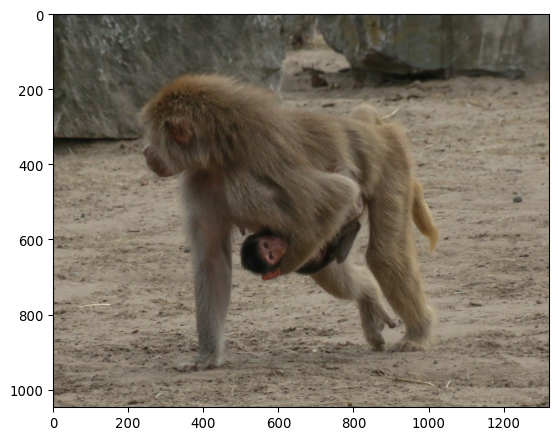

In [19]:

row = data_annotation[500]
print(row[0])

# load & draw image
img = np.asarray(Image.open(data_root + 'images/' + row[0]))
fig, ax = plt.subplots(figsize=(640/my_dpi, 640/my_dpi), dpi=my_dpi)
ax.imshow(img)

img_h, img_w, _ = img.shape

# load & draw segmentation
seg_string= row[2]
Seg = json.loads(seg_string)

In [20]:
row

['69b4e39b7033375b.jpg',
 '[[{"name": "nose", "position": [603.77, 622.97]}, {"name": "left eye", "position": [568, 618]}, {"name": "right eye", "position": [580, 646]}, {"name": "left ear", "position": [535.72, 589.81]}, {"name": "right ear", "position": [587, 692]}, {"name": "left shoulder", "position": null}, {"name": "right shoulder", "position": null}, {"name": "left elbow", "position": null}, {"name": "right elbow", "position": null}, {"name": "left wrist", "position": null}, {"name": "right wrist", "position": null}, {"name": "left hip", "position": [746.86, 621.22]}, {"name": "right hip", "position": null}, {"name": "left knee", "position": [809.68, 561.89]}, {"name": "right knee", "position": null}, {"name": "left ankle", "position": null}, {"name": "right ankle", "position": null}], [{"name": "nose", "position": [244.3, 371.69]}, {"name": "left eye", "position": null}, {"name": "right eye", "position": null}, {"name": "left ear", "position": null}, {"name": "right ear", "posi

In [78]:
# go monkey for monkey and transform segmentation coordinates into bounding boxes
for i_monkey, seg in enumerate(Seg):
    max_xa = []
    max_ya = []
    min_xa = []
    min_ya = []
    for s in seg:
        poly = np.array(s['segment'], np.float32)
        if len(poly) > 0:
            max_xa.append(max(sublist[0] for sublist in poly))
            min_xa.append(min(sublist[0] for sublist in poly))
            max_ya.append(max(sublist[1] for sublist in poly))
            min_ya.append(min(sublist[1] for sublist in poly))
    
    #Da ein Affe aus mehreren Polygonen zusammengesetzt sein kann, wollen wir nur die maximalen Maxima und minimalen Minima
    max_x = max(max_xa)
    min_x = min(min_xa)
    min_y = min(min_ya)
    max_y = max(max_ya)
    
    #Ins Format von FairMOT konvertieren
    x_center = (min_x + (max_x - min_x)/2) / img_w
    y_center = (min_y + (max_y - min_y)/2) / img_h
    w = (max_x - min_x) / img_w
    h = (max_y - min_y) / img_h
    
    
    #Label-String schreiben.

    label_str = '0 {:d} {:.6f} {:.6f} {:.6f} {:.6f}\n'.format(
            i_monkey, x_center , y_center , w , h )
    
    print(label_str)

0 0 0.421127 0.585059 0.169950 0.240743

0 1 0.614194 0.489881 0.378638 0.375105



In [17]:
len(data_annotation[1:])

13083

### Labels for all images

In [82]:
i_monkey = 0

for row in data_annotation[1:]:
    
    img_id = row[0]

    # load image
    img = np.asarray(Image.open(data_root + 'images/' + row[0]))

    img_h, img_w, _ = img.shape

    # load & draw segmentation
    seg_string= row[2]
    Seg = json.loads(seg_string)


    # go monkey for monkey and transform segmentation coordinates into bounding boxes
    for i, seg in enumerate(Seg):
        max_xa = []
        max_ya = []
        min_xa = []
        min_ya = []
        for s in seg:
            poly = np.array(s['segment'], np.float32)
            if len(poly) > 0:
                max_xa.append(max(sublist[0] for sublist in poly))
                min_xa.append(min(sublist[0] for sublist in poly))
                max_ya.append(max(sublist[1] for sublist in poly))
                min_ya.append(min(sublist[1] for sublist in poly))

        #Da ein Affe aus mehreren Polygonen zusammengesetzt sein kann, wollen wir nur die maximalen Maxima und minimalen Minima
        max_x = max(max_xa)
        min_x = min(min_xa)
        min_y = min(min_ya)
        max_y = max(max_ya)

        #Ins Format von FairMOT konvertieren
        x_center = (min_x + (max_x - min_x)/2) / img_w
        y_center = (min_y + (max_y - min_y)/2) / img_h
        w = (max_x - min_x) / img_w
        h = (max_y - min_y) / img_h


        img_id = re.sub("[.]jpg","", img_id)

        #Label-String schreiben.
        label_fpath = data_root + "labels_with_ids/" + img_id +'.txt'

        label_str = '0 {:d} {:.6f} {:.6f} {:.6f} {:.6f}\n'.format(
                i_monkey, x_center, y_center, w * 1.05, h * 1.05)

        with open(label_fpath, 'a') as f:
            f.write(label_str)

        i_monkey += 1
        if i_monkey % 1000 == 0:
            print(i_monkey)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


In [57]:
seed(64)

img_ids = [item[0] for item in data_annotation[1:]]


0.47615826222934565 0.6302190543188851 0.40396096956847294 0.9200240126763269 0.01685162040226995


### Split annotations into train and validation set

In [58]:
for img_id in img_ids:
    if random() < 0.2:
        label_fpath = "/usr/users/vogg/FairMOT/src/data/macaquepose.val"

        label_str =  "MacaquePose/images/" + img_id + "\n"

        with open(label_fpath, 'a') as f:
            f.write(label_str)
    else:
        label_fpath = "/usr/users/vogg/FairMOT/src/data/macaquepose.train"

        label_str =  "MacaquePose/images/" + img_id + "\n"

        with open(label_fpath, 'a') as f:
            f.write(label_str)

### Convert MacaquePose to MacaqueCopyPaste Labels

In [21]:
path = "/usr/users/vogg/FairMOT/src/data/"

with open(path + "macaquepose.train",'r') as f:
    lines = list(csv.reader(f))

In [22]:
for line in lines:
    x = re.sub("Pose", "CopyPasteWild", line[0])
    with open(path + "macaquecpwild.train", 'a') as f:
        f.write(line[0]+"\n")
        f.write(x + "\n")

In [ ]:
## And copy labels_with_ids from MacaquePose to MacaqueCopyPasteWild